# EDA - Career Capstone

# Table of contents:
<h2>
<ol>
1. <a href="#1.Introduction">Introduction</a>   
    <br>
2. <a href="#2.Importing-Libraries">Importing Libraries</a>
    <br>
3. <a href="#3.Load-and-Preview-Data">Load & Preview Data</a>
    <br>
4. <a href="#4.Exploratory-Visualizations">Exploratory Visualizations</a>
    <br>
5. <a href="#5.Data-Cleaning">Data Cleaning</a>
    <br>
6. <a href="#6.Joining-with-Transactional-data">Joining with Transactional data</a></ol></h2>


## 1.Introduction

#### Home Credit is an international consumer finance provider which operates in 9 countries. It provides point of sales loans, cash loans and revolving loans to underserved borrowers. The term undeserved borrower here refers to those who earn regular income from their job or businesses, but have little or no credit history and find it difficult to get credits from other traditional lending organizations. They believe that the credit history should not be a barrier for a borrower to fulfill their dreams.                                     The goal of the project is to leverage the accumulated borrower behavioral data to develop predictive models. These models will enable Home Credit to efficiently analyze the risk associated with a given client and estimate the safe credit amount to be lent, even for underserved borrowers with little or no credit history. Ultimately, the aim is to provide financial assistance to customers and fulfill their dreams while ensuring responsible lending practices.

### Business Problem

#### Home Credit is facing a substantial barrier in providing loans to individuals with insufficient or non-existent credit histories. This challenge hampers the company's mission of broadening financial inclusion and exposes this demographic to exploitation by untrustworthy lenders.

### Analytics Approach

#### This is a predictive analytics project, and the analytics approach for solving the problem will involve a supervised learning methodology. A classification algorithm will be utilized to predict whether a loan applicant is likely to repay or not. We will make use of a variety of alternative data (including telco and transactional information) to create the model. The target variable for the supervised classification model will be binary, indicating whether the applicant is classified as capable of repayment or not.

### Scope

#### The project entails developing a predictive analytics model through supervised learning and a classification algorithm for loan repayment prediction. Utilizing diverse alternative data, including telco and transactional information, the scope encompasses model development, validation, and integration. Excluded from the scope are detailed loan decline analyses and specific loan term considerations. Potential future additions involve refining the model with extra data sources or incorporating real-time updates.

## 2.Importing Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid',palette="colorblind")

# Supress unnecessary warnings so that the presentation looks clean
import warnings
warnings.filterwarnings('ignore')

# display plots on the notebook itself
%matplotlib inline 

## 3.Load and Preview Data

#### Data Source: https://www.kaggle.com/competitions/home-credit-default-risk/data

In [2]:
#Load datasets
train_dataset=pd.read_csv("application_train.csv")
test_dataset=pd.read_csv("application_test.csv")

previous_app=pd.read_csv("previous_application.csv")
sample_submission=pd.read_csv("sample_submission.csv")
installments_payments=pd.read_csv("installments_payments.csv")
credit_card_balance=pd.read_csv("credit_card_balance.csv")
bureau_balance=pd.read_csv("bureau_balance.csv")
bureau=pd.read_csv("bureau.csv")
POS_CASH_balance=pd.read_csv("POS_CASH_balance.csv")

In [3]:

merged_df = pd.merge(train_dataset, installments_payments, on='SK_ID_CURR', how='left')

In [7]:
installments_payments['NUM_INSTALMENT_VERSION'].head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [4]:
# Train Dataset
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775
4,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775


In [4]:
train_dataset.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
train_dataset.shape

(307511, 122)

In [7]:
# Number of each type of column
train_dataset.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [8]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
#Missing Values
train_dataset.isna().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [10]:
#Number of duplicates
train_dataset.duplicated().sum()

0

In [11]:
# Number of unique classes in each object column
# -- of catagorical variable
train_dataset.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [11]:
# Testdataset

In [12]:
test_dataset.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
test_dataset.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [14]:
test_dataset.shape

(48744, 121)

In [15]:
test_dataset.dtypes.value_counts()

float64    65
int64      40
object     16
Name: count, dtype: int64

In [16]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [17]:
test_dataset.isna().sum().sort_values(ascending=False)

COMMONAREA_AVG              33495
COMMONAREA_MODE             33495
COMMONAREA_MEDI             33495
NONLIVINGAPARTMENTS_AVG     33347
NONLIVINGAPARTMENTS_MODE    33347
                            ...  
NAME_HOUSING_TYPE               0
NAME_FAMILY_STATUS              0
NAME_EDUCATION_TYPE             0
NAME_INCOME_TYPE                0
SK_ID_CURR                      0
Length: 121, dtype: int64

In [18]:
test_dataset.duplicated().sum()

0

In [19]:
test_dataset.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

#### These are the two main tables provided and contains train set (contains TARGET) and test set. Organized by SK_ID_CURR
#### Train Set:
#### 122 columns and 307511 rows
#### 16 categorical 106 numeric
#### Test Set:
#### 121 columns and 48744 rows
#### 16 categorical 105 numeric

## 4.Exploratory Visualizations

##### TARGET value 0 means loan is repayed, value 1 means loan is not repayed.

Target variable count:
TARGET
0    282686
1     24825
Name: count, dtype: int64


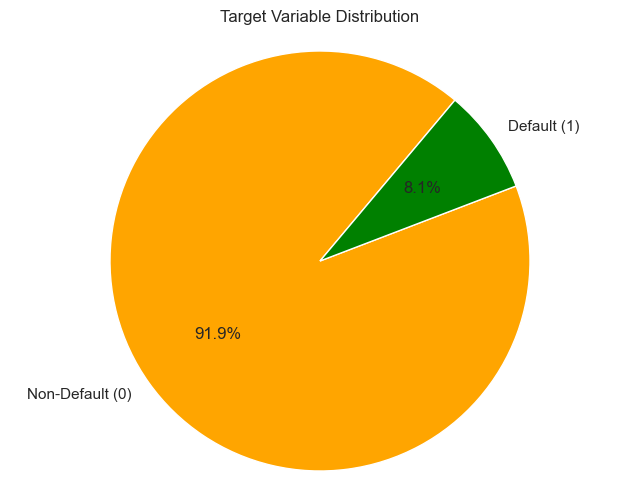

In [20]:
train_target = train_dataset['TARGET'].value_counts()
print("Target variable count:")
print(train_target)

labels = ['Non-Default (0)', 'Default (1)']
plt.figure(figsize=(8, 6))
plt.pie(train_target, labels=labels,colors=['orange', 'green'], autopct='%1.1f%%', startangle=50)
plt.title('Target Variable Distribution')
plt.axis('equal') 
plt.show()

#### Upon observing the distribution of the Target variable, it's evident that there is a significant data imbalance. Only 8.07% of the total loans in the dataset have been identified as defaulted, making them the minority class. In contrast, 91.9% of loans are categorized as non-defaulted, representing the majority class. Defaulted loans are denoted by a Target variable of 1, while non-defaulted loans are denoted by a Target variable of 0. Given this imbalance, using accuracy as the evaluation metric may lead to biased results favoring the majority class. Instead, it's advisable to utilize other evaluation metrics such as ROC-AUC Score, Log-Loss, F1-Score, or Confusion Matrix for a more comprehensive assessment of model performance.

Text(0.5, 1.0, 'Distribution of Clients Age')

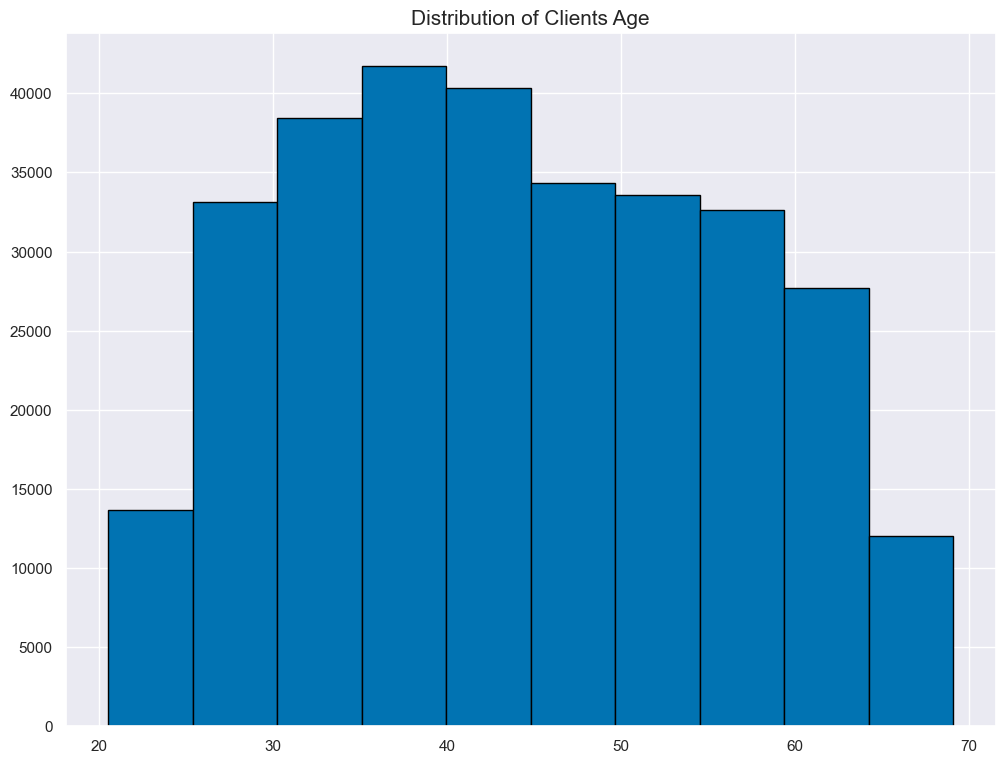

In [21]:
# Distribution of Clients Age
fig = plt.figure(figsize=(12,9))
plt.hist(train_dataset['DAYS_BIRTH']/-365, edgecolor = 'black')
plt.title('Distribution of Clients Age', fontsize=15)

In [22]:
print(train_dataset.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


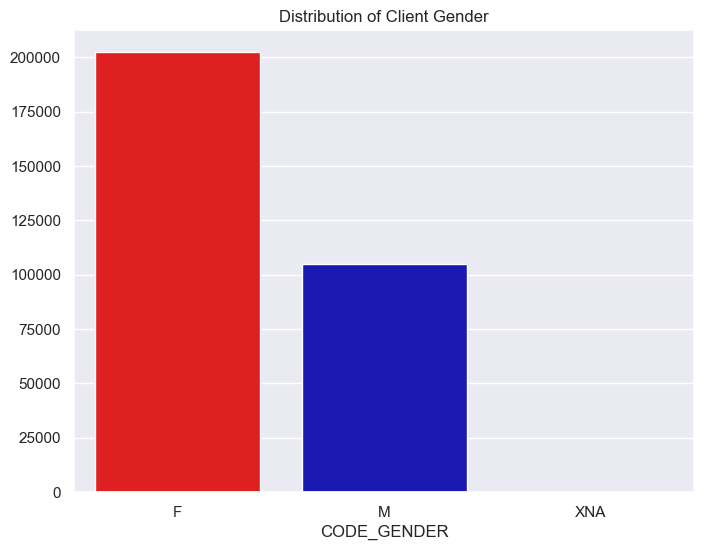

Females are the highest borrowers with counts:
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


In [23]:

gender_counts = train_dataset['CODE_GENDER'].value_counts()

# Plot the count of each Gender
fig = plt.figure(figsize=(8,6))
sns.barplot(x=gender_counts.index, y=gender_counts.values,palette=['Red','mediumblue'])
plt.title('Distribution of Client Gender')
plt.show()

print("Females are the highest borrowers with counts:\n{}".format(train_dataset.CODE_GENDER.value_counts()))

Text(0.5, 1.0, 'Distribution of Loan Type')

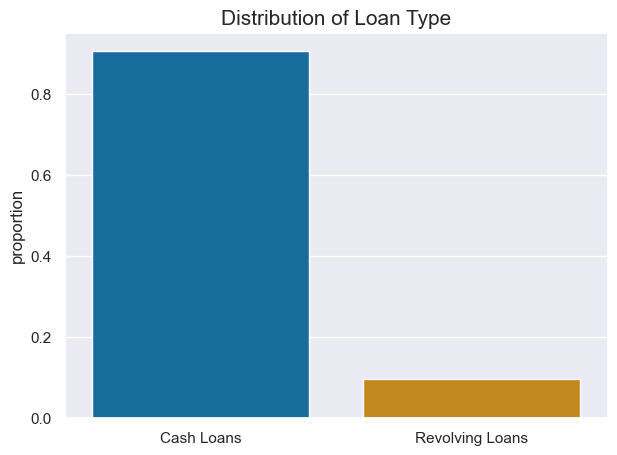

In [24]:
#Distribution of Loan Type
fig = plt.figure(figsize=(7,5))
sns.barplot(x=['Cash Loans','Revolving Loans'], y=train_dataset['NAME_CONTRACT_TYPE'].value_counts(normalize=True))
plt.title('Distribution of Loan Type', fontsize=15)
#From this, we can observe that most of the people are taking cash loans instead of revolving loans.

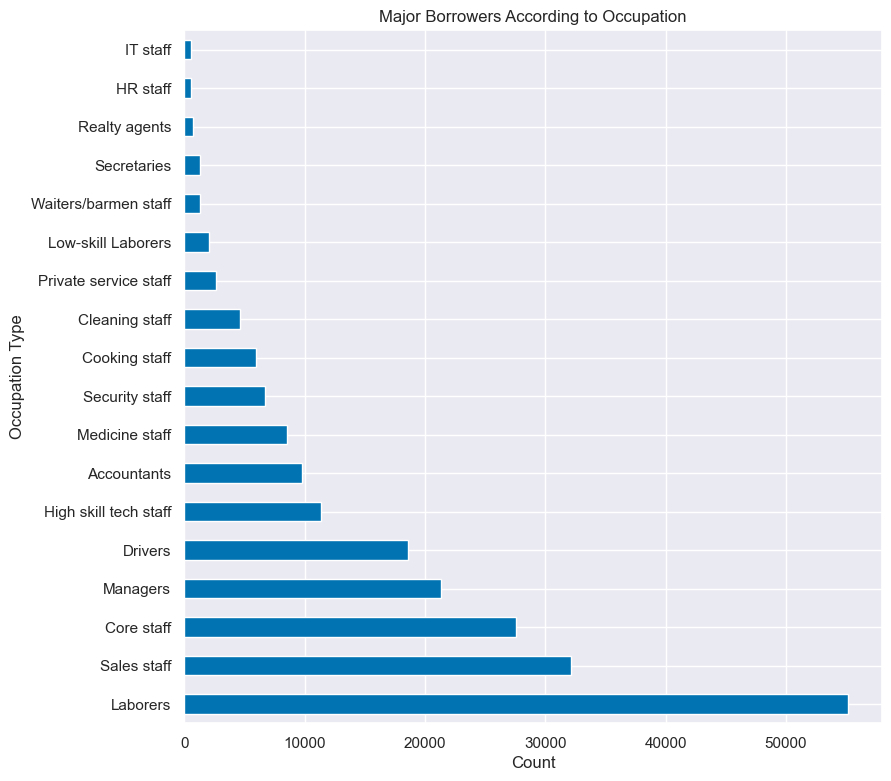

In [25]:
# Major Borrowers according to occupation
fig = plt.subplots(figsize=(9,9))
occupation_counts = train_dataset['OCCUPATION_TYPE'].value_counts()
occupation_counts.plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("Occupation Type")
plt.title("Major Borrowers According to Occupation")
plt.show()

In [26]:
# Exclude non-numeric columns
numeric_cols = train_dataset.select_dtypes(include=[np.number]).columns

# Correlation with target variable
correlations = train_dataset[numeric_cols].corr()['TARGET'].sort_values()
print("Top 10 positive correlations:\n", correlations.tail(10))
print("\nTop 10 negative correlations:\n", correlations.head(10))

# The variable with the strongest positive correlation is DEF_60_CNT_SOCIAL_CIRCLE (0.031), 
#while the strongest negative correlations are observed with EXT_SOURCE_3 (-0.18),
#followed closely by EXT_SOURCE_1 (-0.16) and EXT_SOURCE_2 (-0.16).
#These findings suggest that individually, none of these variables exhibit a notably strong correlation with the 
#target variable.

Top 10 positive correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Top 10 negative correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


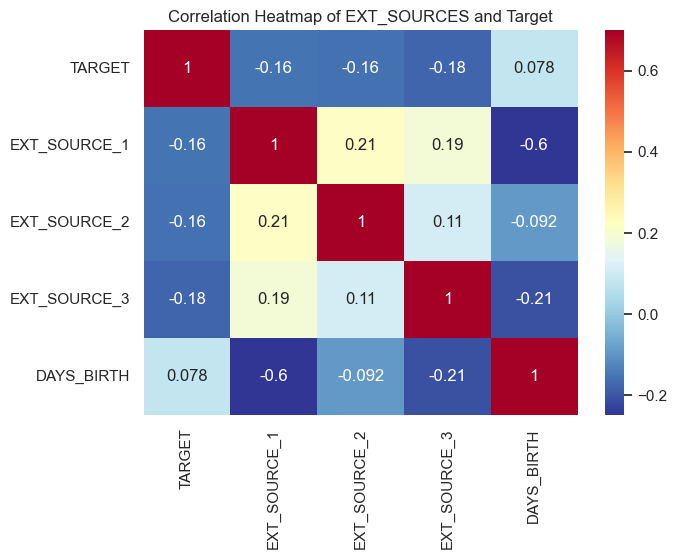

In [28]:
ext_data = train_dataset[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corr = ext_data.corr()
plt.figure(figsize = (7, 5))

 #Heatmap of correlations
sns.heatmap(ext_data_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.7)
plt.title('Correlation Heatmap of EXT_SOURCES and Target');

## 5.Data Cleaning

In [18]:
# Handling missing values
# Dropping columns with more than 60% missing values
threshold = 0.6 * len(train_dataset)
train_dataset = train_dataset.dropna(thresh=threshold, axis=1)

# Imputing missing values for numerical columns with their mean
numerical_cols = train_dataset.select_dtypes(include=['float64', 'int64']).columns
train_dataset[numerical_cols] = train_dataset[numerical_cols].fillna(train_dataset[numerical_cols].median())

# Imputing missing values for categorical columns with mode
categorical_cols = train_dataset.select_dtypes(include='object').columns
train_dataset[categorical_cols] = train_dataset[categorical_cols].fillna(train_dataset[categorical_cols].mode().iloc[0])

# Encoding categorical variables
train_dataset = pd.get_dummies(train_dataset)


In [19]:
train_dataset.isna().sum().sort_values(ascending=False)

SK_ID_CURR                            0
WEEKDAY_APPR_PROCESS_START_FRIDAY     0
OCCUPATION_TYPE_Laborers              0
OCCUPATION_TYPE_Low-skill Laborers    0
OCCUPATION_TYPE_Managers              0
                                     ..
EMPLOYED_TO_AGE_RATIO                 0
FLAG_CONTACTS_SUM                     0
HOUR_PROCESS_CREDIT_MUL               0
CNT_NON_CHILDREN                      0
ORGANIZATION_TYPE_XNA                 0
Length: 206, dtype: int64

## 6.Joining with Transactional data

In [30]:
# Identifying the common columns
com_col = list(set(bureau.columns) & set(train_dataset.columns))
print("Common Columns:")
for column in com_col:
    print(column)

# Joining the application_train dataset with bureau dataset
bureau_merge = pd.merge(train_dataset, bureau, on="SK_ID_CURR")
bureau_merge.head()

Common Columns:
AMT_ANNUITY
SK_ID_CURR


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,-1038.0,NaN,0,40761.0,NaN,NaN,0.0,Credit card,-1038,0.0
1,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,-48.0,NaN,0,0.0,0.0,NaN,0.0,Credit card,-47,NaN
2,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,-1185.0,0.000,0,135000.0,0.0,0.0,0.0,Consumer credit,-1185,0.0
3,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,-911.0,3321.000,0,19071.0,NaN,NaN,0.0,Consumer credit,-906,0.0
4,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,-36.0,5043.645,0,120735.0,0.0,0.0,0.0,Consumer credit,-34,0.0


In [31]:
numeric_df = bureau_merge.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
corr_tar = corr_matrix["TARGET"].sort_values(ascending= False)

In [32]:
corr_tar

TARGET                         1.000000
DAYS_BIRTH                     0.066888
DAYS_CREDIT                    0.061556
REGION_RATING_CLIENT_W_CITY    0.050320
REGION_RATING_CLIENT           0.048372
                                 ...   
DAYS_EMPLOYED                 -0.032887
EXT_SOURCE_2                  -0.146015
EXT_SOURCE_3                  -0.181536
FLAG_MOBIL                          NaN
FLAG_DOCUMENT_2                     NaN
Name: TARGET, Length: 74, dtype: float64